# Тест Blockchain School.
## Дмитрий Насыров (rudrafury@gmail.com)

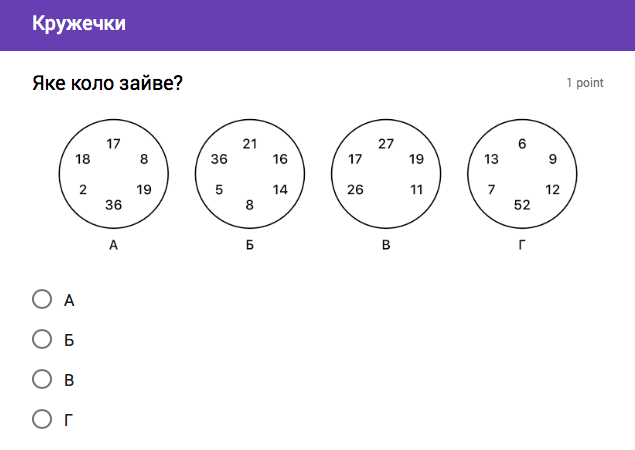

<b>Круг А:</b> 2+18+17+8+19+36 = 100 <br/>
<b>Круг Б:</b> 5+36+21+16+14+8 = 100 <br/>
<b>Круг В:</b> 26+17+27+19+11 = 100 <br/>
<b>Круг Г:</b> 7+13+6+9+12+52 = 99 <br/>
<b>Вывод: сумма всех элементов в круге Г не равна сумме элементов остальных кругов. Круг Г лишний. </b>

___

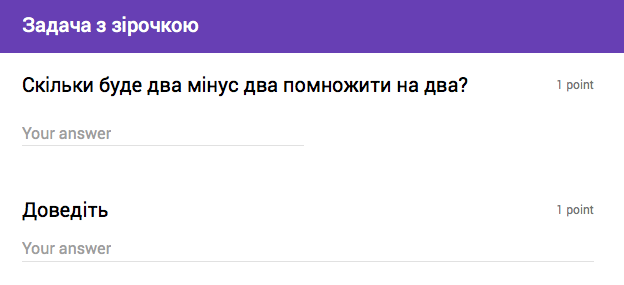

\begin{equation*}2-2*2=-2\end{equation*} <br/>
В условии задачи скобки не указаны, значит умножение имеет приоритет, -2 имеет противоположное число 2, значит \begin{equation*}-2+2=0\end{equation*} <br/>
Докажем: <br/>
\begin{equation*}2-2*2+2 = 0 <=> 2(1-2+1) = 0 <=> 2*0=0\end{equation*}

___

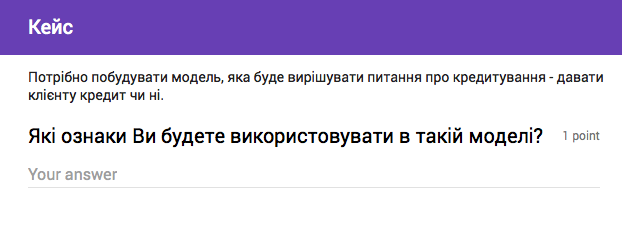

Построим Decision Tree на основании следующих признаков:
1. Наличие официального трудоустройства;
2. Среднемесячный уровень дохода, проходящий в налоговых отчетах под кодом "Заробiтна плата";
3. Возраст;
4. Трудовой стаж на последнем месте трудоустройства;
5. Наличие недвижимого имущества;
6. Наличие автомобиля в собственности.
7. Наличие друзей и знакомых подтверждающих, что гражданин не убежит.

Распишем дерево в виде условий, тк не знаю как его нарисовать в Jupyter Notebook.

1. Возраст > 60 или < 18 - отказать;
2. Неофициально трудоустроен - отказать;
3. Стаж меньше 6-и мес на последнем месте трудоустройства - отказать;
4. Наличие недвижимого имущества площадью меньше 8-и кв.метров или отсутствие - отказать;
5. Наличие автомобиля отечественного производства, автомобиля выпущенного до 1990-го года или отсутствие автомобиля - отказать;
4. Зарплата больше 16К грн. - предложить на 3 года под 70% годовых или на 7 лет под 120% годовых;
5. Зарплата ниже 16К грн. - предложить на 7 лет под 200% годовых или на 100 лет под 4000% годовых с передачей по наследству;
6. Наличие 150-и знакомых подтвержденных номерами телефонов, подтверждающих благосостояние и готовых отдать ногу за гражданина - выдать кредит;
7. Наличие 100-ни знакомых подтвержденных номерами телефонов, не знающих точно адрес прописки всех родственников гражданина - отказать в кредите.

___

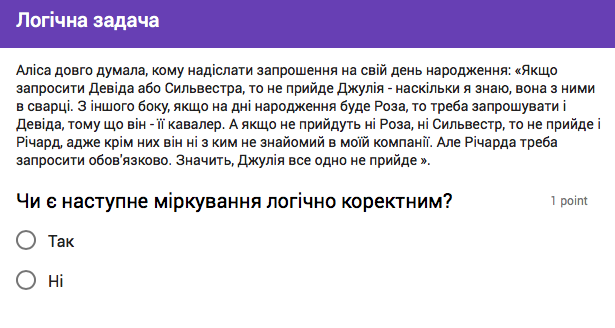

Придет Девид = P <br/>
Придет Сильвестр = Q <br/>
Придет Джулия = R <br/>
Придет Роза = A <br/>
Придет Ричард = S <br/><br/>

\begin{equation*} P \vee Q \implies \neg R = 1 \end{equation*} <br/>
\begin{equation*} A \implies P = 1 \end{equation*} <br/>
\begin{equation*} \neg A \wedge \neg Q \implies \neg S = 1 \end{equation*} <br/>
\begin{equation*} S = 1 \end{equation*} <br/>

\begin{equation*} 1)\space \neg(P \vee Q) \vee \neg R = 1 \end{equation*} <br/>
\begin{equation*} 2)\space (P \vee Q) \wedge R = 0 \end{equation*} <br/>
\begin{equation*} 3)\space R = 0 \space - \space Джулия \space не \space придет. \end{equation*} <br/>

___

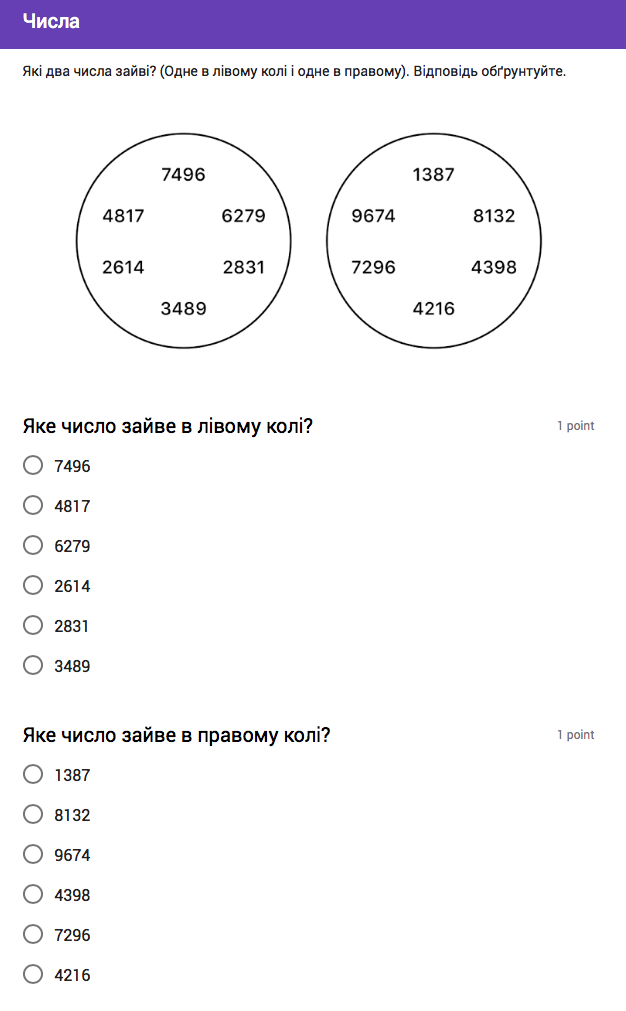

<b>a) Какое число лишнее в левом круге:</b><br/>
<b>Ответ: 4817, т.к. простое число и имеет один множитель. У остальных четное количество множителей.</b><br/><br/>

\begin{equation*}
\frac{7496}{2} => \frac{3748}{2} => \frac{1874}{2} => \frac{937}{937}
\end{equation*} <br/>

4817 - простое число <br/>

\begin{equation*}
\frac{6279}{3} => \frac{2093}{7} => \frac{299}{13} => \frac{23}{23}
\end{equation*} <br/>

\begin{equation*}
\frac{2614}{2} => \frac{1307}{1307}
\end{equation*} <br/>

\begin{equation*}
\frac{2831}{19} => \frac{149}{149}
\end{equation*} <br/>

\begin{equation*}
\frac{3489}{3} => \frac{1163}{1163}
\end{equation*} <br/><br/>

<b>б) Какое число лишнее в правом круге:</b><br/>
<b>Ответ: 1387, т.к. не делится на 2</b><br/><br/>

\begin{equation*}
\frac{1387}{19} => \frac{73}{73}
\end{equation*} <br/>

\begin{equation*}
\frac{8132}{2} => \frac{4066}{2} => \frac{2033}{19} => \frac{107}{107}
\end{equation*} <br/>

\begin{equation*}
\frac{9674}{2} => \frac{4837}{7} => \frac{691}{691}
\end{equation*} <br/>

\begin{equation*}
\frac{4398}{2} => \frac{2199}{3} => \frac{733}{733}
\end{equation*} <br/>

\begin{equation*}
\frac{7296}{2} => \frac{3648}{2} => \frac{1824}{2} => \frac{912}{2} => \frac{456}{2} => \frac{228}{2} => \frac{114}{2} => \frac{57}{2} => \frac{19}{19}
\end{equation*} <br/>

\begin{equation*}
\frac{4216}{2} => \frac{2108}{2} => \frac{1054}{2} => \frac{527}{17} => \frac{31}{31}
\end{equation*} <br/>

___

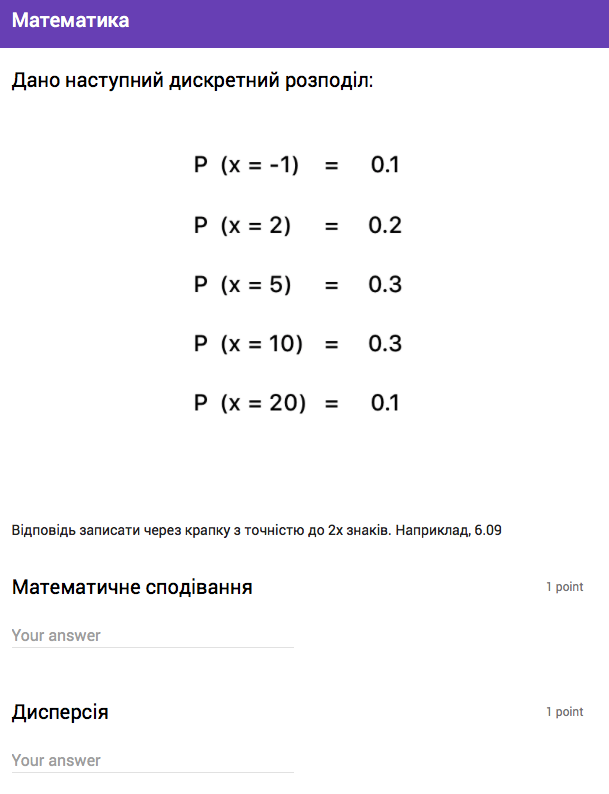

| \begin{equation*} X_i \end{equation*} | -1  |  2  |  5  |  10 |  20 |
|---------------------------------------|-----|-----|-----|-----|-----|
| \begin{equation*} P_i \end{equation*} | 0.1 | 0.2 | 0.3 | 0.3 | 0.1 |
<br/><br/>
<b>Мат. ожидание:</b> \begin{equation*} m=\sum_{} X_i*P_i \end{equation*}<br/>
\begin{equation*} M(x)=-1*0.1 + 2*0.2 + 5*0.3 + 10*0.3 + 20*0.1 = 6.8 \end{equation*} <br/><br/>
<b>Дисперсия:</b> \begin{equation*} d=\sum_{} X_i^2*P_i - M(x)^2 \end{equation*}<br/>
\begin{equation*} D(x)=(-1)^2*0.1 + 2^2*0.2 + 5^2*0.3 + 10^2*0.3 + 20^2*0.1 - 6.8^2 = 32.16 \end{equation*}


___

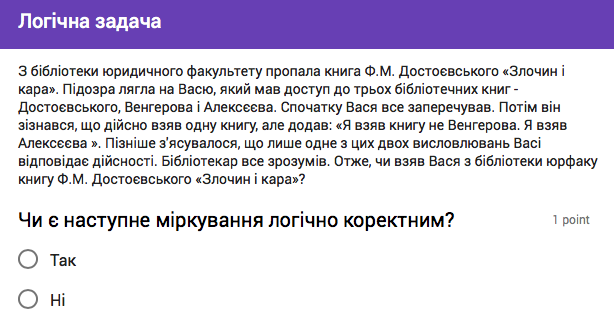

Вася взял Венгерова = А <br/>
Вася взял Алексеева = B <br/>
Вася взял Достоевского = C <br/><br/>

1) \begin{equation*} \neg A = F, B = T \end{equation*} <br/>
2) \begin{equation*} \neg A = T, B = F \end{equation*} <br/><br/>

Замена ложного высказывания его истинной парой:<br/>
1) \begin{equation*} A = T \end{equation*} <br/>
2) \begin{equation*} \neg B = T \end{equation*} <br/><br/>

Сопоставим истинные высказывания, если они не противоречат друг другу, то логическая конструкция верна.<br/>
1) \begin{equation*} A = T, B = T \end{equation*} Правдивое высказывание не может противоречить. Неправдиво. <br/>
2) \begin{equation*} \neg A = T, \neg B = T => \neg A, \neg B => C = T \end{equation*} Не противоречит. Правдиво. <br/><br/>

<b>Ответ: Вася таки взял Достоевского!</b>

___

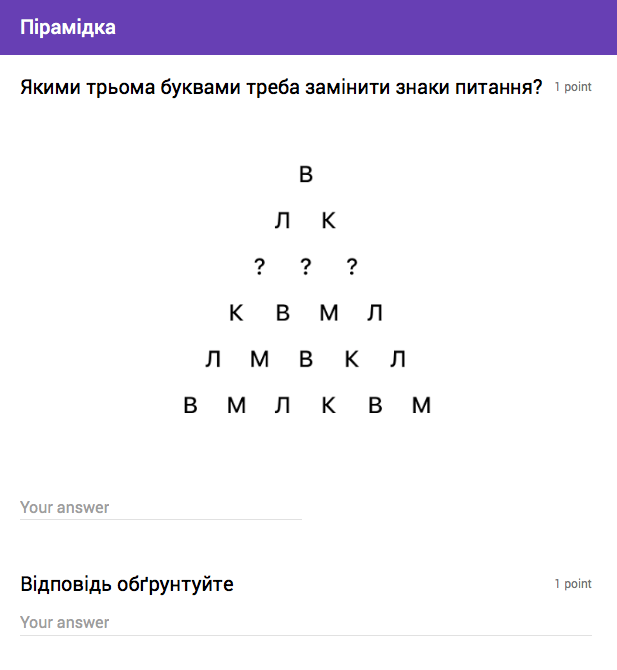

<b>Ответ: М В К.</b><br/>
Змеевидное прохождение. Для простоты картины заменим буквы на цифры, соответствующие украинскому алфавиту. В=3, К=15, Л=16, М=17. Получаем проходят сверху вниз, справа налево. 3 15 16 17 3 15 16 17 3 итд. Соответственно числа третьего ряда 17 3 15, что соответствует буквам М В К.

___

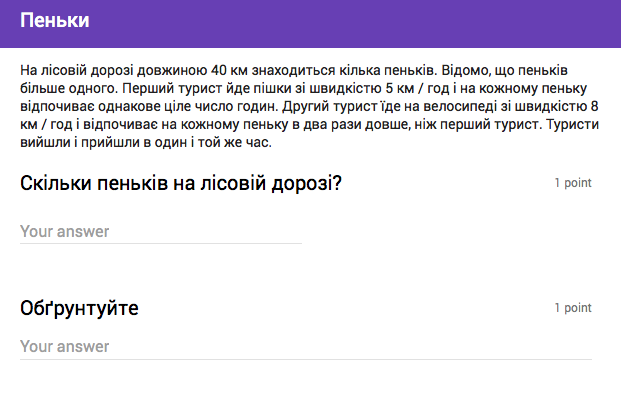

\begin{equation*}v_1 \space =\space 5км/ч\end{equation*} <br/>
\begin{equation*}v_2 \space = \space 8км/ч\end{equation*} <br/>
\begin{equation*}n \space - \space кол-во \space пеньков\end{equation*} <br/>
\begin{equation*}L \space = \space 40км\end{equation*} <br/>
\begin{equation*}t_1 \space - \space время \space отдыха \space 1-го \space туриста\end{equation*}<br/>
\begin{equation*}t_2 \space - \space время \space отдыха \space 2-го \space туриста, \space где \space t_2 = 2t_1, \space  \forall t_1 \in \mathbb{Z}\end{equation*}<br/>
\begin{equation*}t_1общ \space - \space время, \space за \space которое \space прошел \space расстояние \space L \space первый \space турик\end{equation*}<br/>
\begin{equation*}t_2общ \space - \space время, \space за \space которое \space прошел \space расстояние \space L \space второй \space турик\end{equation*}<br/> \begin{equation*}t_1общ=t_2общ.\end{equation*}<br/>
\begin{equation*}Найти \space n.\end{equation*} <br/><br/>

Предположим, первый турист не останавливается, тогда он проходит расстояние за 8 часов.<br/>
\begin{equation*}t_1общ=8+t_1*n\end{equation*}<br/>
Предположим, второй турист не останавливается, тогда он проходит расстояние за 5 часов.<br/>
\begin{equation*}t_1общ=5+2*t_1*n\end{equation*}<br/>
Слевдовательно \begin{equation*}t_1*n=3\end{equation*}<br/>
\begin{equation*}Поскольку \space t_1 \in \mathbb{Z}, \space n>1, \space то \space n=3\end{equation*}<br/>

___

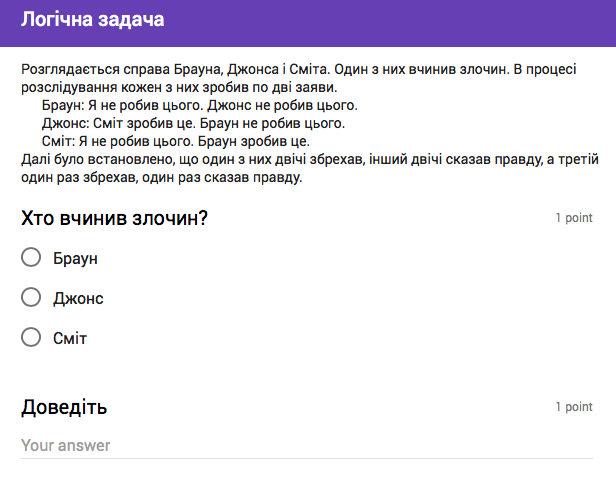

Три варианта: 1. украл Браун, 2. украл Джонс, 3. украл Смит.<br/>
Если Смит украл, то два других сказали правду;<br/>
Если Джонс украл, то два других сказали правду и ложь;<br/>
<b>Вывод: Браун вор.</b>

___

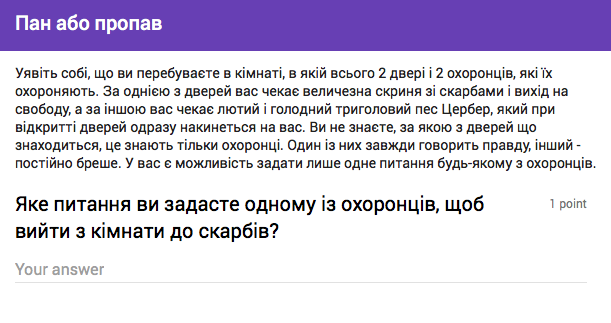

Если сокровища за вруном, он скажет Нет, а тот, кто говорит правду - Да. А если сокровища за тем, кто говорит правду, он скажет Нет, а врун - Да.
Вопрос: за вруном дверь к сокровищам? Использовать дверь, противоположную ответу.

___

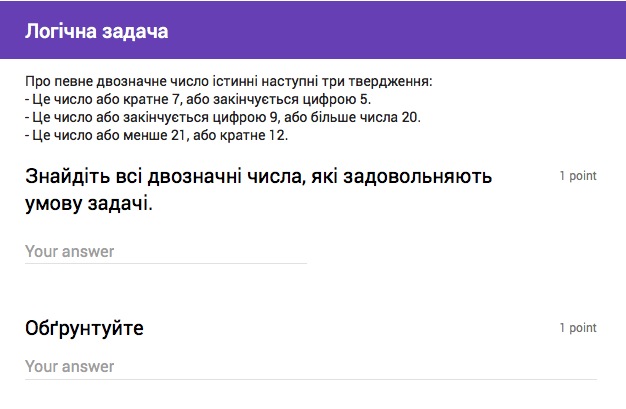

Скажем:<br/>
Число кратное 7 = А <br/>
Заканчивается цифрой 5 = B <br/>
\begin{equation*}A \vee B \space дизъюнкция предикатов \end{equation*} <br/>
Заканчивается 9 = C <br/>
Больше 20-и = D <br/>
\begin{equation*}C \vee D \space \end{equation*} <br/>
Меньше 21-го = E
Кратное 12-и = F
\begin{equation*}E \vee F \space \end{equation*} <br/>
Из трехместного предиката:<br/>
\begin{equation*}A={14,21,28,35,42,49,56,63,70,77,84,91,98}\end{equation*} <br/>
\begin{equation*}B={15,25,35,45,55,65,75,85,95}\end{equation*} <br/>
\begin{equation*}A \cup B = {14,15,21,25,28,35,42,45,49,55,56,63,65,70,75,77,84,85,91,95,98}\end{equation*} <br/><br/>

\begin{equation*}C={19,29,39,49,59,69,79,89,99}\end{equation*} <br/>
\begin{equation*}D={21,22,23...99}\end{equation*} <br/>
\begin{equation*}C \cup D = {19,21,22,23..99}\end{equation*} <br/><br/>

\begin{equation*}E={10,11,12...20}\end{equation*} <br/>
\begin{equation*}F={12,24,36,48,60,72,84,96}\end{equation*} <br/>
\begin{equation*}E \cup F = {10,11,12,13,14,15,16,17,18,19,20,24,36,48,60,72,84,96}\end{equation*} <br/>

\begin{equation*}(A \cup B) \cap (C \cup D) \cap (E \cup F) \end{equation*} <br/>
\begin{equation*}(C \cup D) \cap (E \cup F) = \varnothing \end{equation*} <br/>
\begin{equation*}(C \cup D) \cap \varnothing = \varnothing \end{equation*} <br/>

___

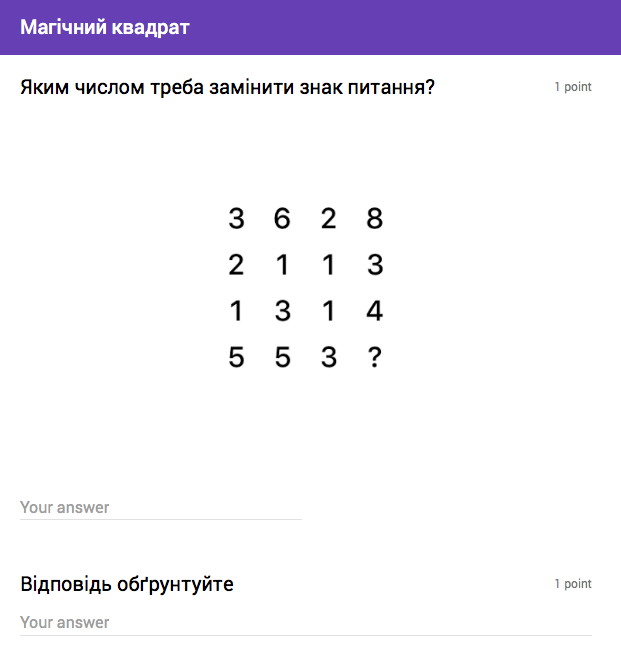

Разделим квадрат на подквадраты 2x2. Тогда сумма ячеек правого верхнего подквадрата равна 14, сумма нижнего левого подквадрата равна 14, сумма левого верхнего равна 12, соответственно сумма правого нижнего тоже должна быть 12. В правом нижнем имеем 1+4+3+x=12, где x=4. <br/>
<b>Ответ: 4</b>

___

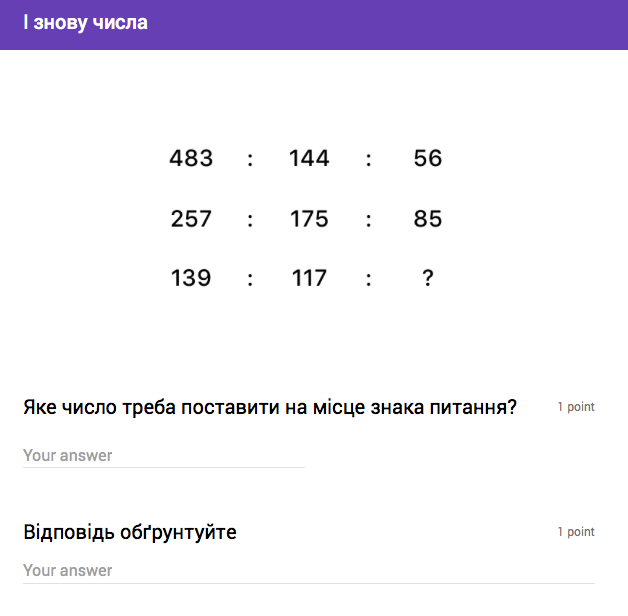

\begin{equation*}48*3=144,\space 14*4=56\end{equation*} <br/>
\begin{equation*}25*7=175,\space 17*5=85\end{equation*} <br/>
\begin{equation*}13*9=117,\space 11*7=77\end{equation*} <br/>
<b>Ответ: 77</b>

___

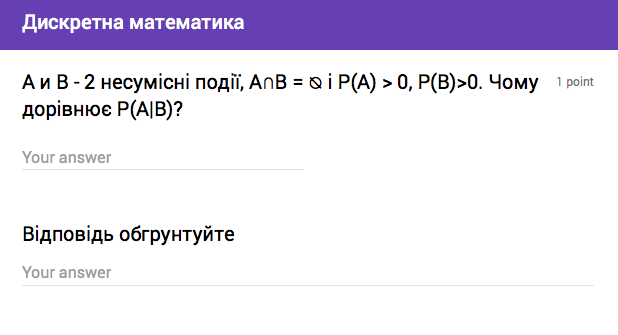

\begin{equation*}
P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{0}{P(B)} = 0
\end{equation*} <br/>

___

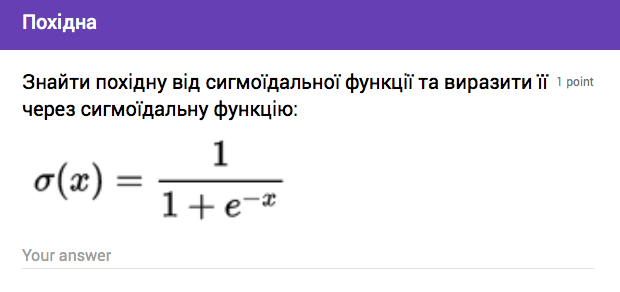

\begin{equation*}
\sigma(x)=\frac{1}{1+e^{-x}}
\end{equation*}<br/>

\begin{equation*}
\frac{d}{dx}\sigma(x)=\frac{d}{dx}((1+e^{-x})^{-1}) = -((1+e^{-x})^{-2})(\frac{d}{dx}(1) + \frac{d}{dx}e^{-x})=-((1+e^{-x})^{-2})(e^{-x}\frac{d}{dx}(-x)) = ((1+e^{-x})^{-2})*(e^{-x}) = \frac{e^{-x}}{(1+e^{-x})^2}
\end{equation*}

___

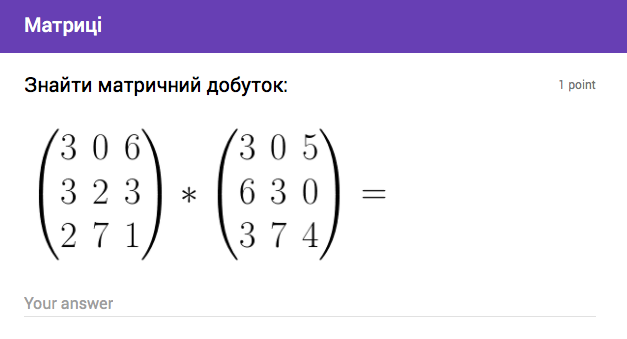

\begin{equation*} c_11 = a_11*b_11 + a_12*b_21 + a_13*b_31 = 3*3 + 0*6 + 6*3 = 27\end{equation*} <br/>
\begin{equation*} c_12 = a_11*b_12 + a_12*b_22 + a_13*b_32 = 3*0 + 0*3 + 6*7 = 42\end{equation*} <br/>
\begin{equation*} c_13 = a_11*b_13 + a_12*b_22 + a_13*b_33 = 3*5 + 0*0 + 6*4 = 39\end{equation*} <br/><br/>

\begin{equation*} c_21 = a_21*b_11 + a_22*b_21 + a_23*b_31 = 3*3 + 2*6 + 3*3 = 30\end{equation*} <br/>
\begin{equation*} c_22 = a_21*b_12 + a_22*b_22 + a_23*b_32 = 3*0 + 2*3 + 3*7 = 27\end{equation*} <br/>
\begin{equation*} c_23 = a_21*b_13 + a_22*b_22 + a_23*b_33 = 3*5 + 2*0 + 3*4 = 27\end{equation*} <br/><br/>

\begin{equation*} c_31 = a_31*b_11 + a_32*b_21 + a_33*b_31 = 2*3 + 7*6 + 1*3 = 51\end{equation*} <br/>
\begin{equation*} c_32 = a_31*b_12 + a_32*b_22 + a_33*b_32 = 2*0 + 7*3 + 1*7 = 28\end{equation*} <br/>
\begin{equation*} c_33 = a_31*b_13 + a_32*b_22 + a_33*b_33 = 2*5 + 7*0 + 1*4 = 14\end{equation*} <br/><br/>

\begin{equation*} 
\begin{vmatrix}
27 & 42 & 39 \\
30 & 27 & 27 \\
51 & 28 & 14
\end{vmatrix}
\end{equation*} <br/>


___

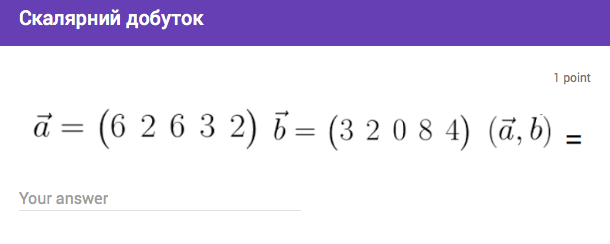

\begin{equation*}\vec{a}*\vec{b} = \sum a_n*b_n\end{equation*} <br/>
\begin{equation*}\vec{a}*\vec{b} = 6*3 + 2*2 + 6*0 + 3*8 + 2*4 = 54\end{equation*} <br/>

___

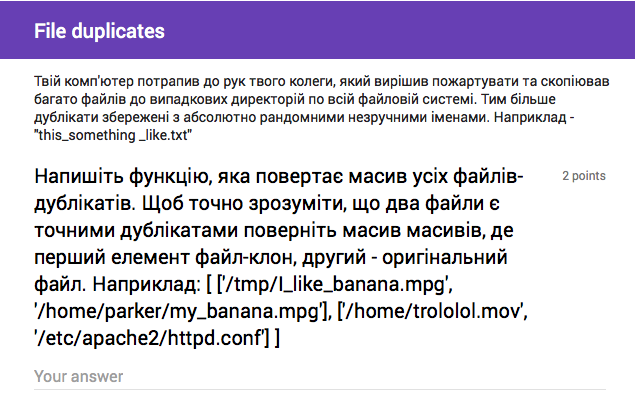

In [2]:
names_duplicates = ["/Users/Blockchain/file_A", "/tmp/file_B", "/opt/.file_C.mp4", "/bin/file_not_found.txt"]
names_originals = ["/Users/Blockchain/Documents/copy_A", "/Users/Blockchain/copy_B", 
                   "/Users/Blockchain/Music/copy_C.mp3"]
result = []

for idx in range(max((len(names_duplicates), len(names_originals)))):
    while True:
        try:
            element = (names_duplicates[idx], names_originals[idx])
        except IndexError:
            if len(names_duplicates) > len(names_originals):
                names_originals.append(None)
                element = (names_duplicates[idx], names_originals[idx])
            elif len(names_duplicates) < len(names_originals):
                names_duplicates.append(None)
                element = (names_duplicates[idx], names_originals[idx])
                
            continue
            
        result.append(element)
        break

for idx, (copy, original) in enumerate(result):
    if original is None:
        print("{}. Can't find original file for '{}'".format(idx, copy))
    else:
        print("{}. Duplicate '{}' found, original at '{}'".format(idx, copy, original))

0. Duplicate '/Users/Blockchain/file_A' found, original at '/Users/Blockchain/Documents/copy_A'
1. Duplicate '/tmp/file_B' found, original at '/Users/Blockchain/copy_B'
2. Duplicate '/opt/.file_C.mp4' found, original at '/Users/Blockchain/Music/copy_C.mp3'
3. Can't find original file for '/bin/file_not_found.txt'


___

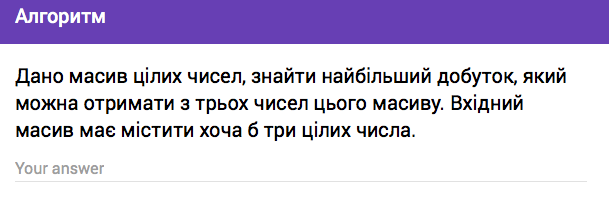

In [3]:
from operator import mul
from functools import reduce

def deduplicate(values=[]):
    return list(set(values))

def insertionSort(values=[]):
    for idx in range(1, len(values)):
        currentValue = values[idx]
        position = idx

        while position > 0 and values[position - 1] > currentValue:
            values[position] = values[position - 1]
            position = position - 1

        values[position] = currentValue
    
    return values
        
def pipe(values):
    if len(values) < 3:
        return "Bad input. Number of elements need to be > 3"
    else:
        print("Input:", values)
        values = deduplicate(values)
        print("Deduplicate:", values)
        values = insertionSort(values)
        print("Sorted:", values)
        values = values[-3:]
        print("Last 3:", values)
        return reduce(mul, values, 1)
    
values = [-10, -3, 5, 6, 15, 15, -20, -12, 15, 1, 2, 0]
print("Result:", pipe(values))

Input: [-10, -3, 5, 6, 15, 15, -20, -12, 15, 1, 2, 0]
Deduplicate: [0, 1, 2, 5, 6, -20, 15, -12, -10, -3]
Sorted: [-20, -12, -10, -3, 0, 1, 2, 5, 6, 15]
Last 3: [5, 6, 15]
Result: 450


___

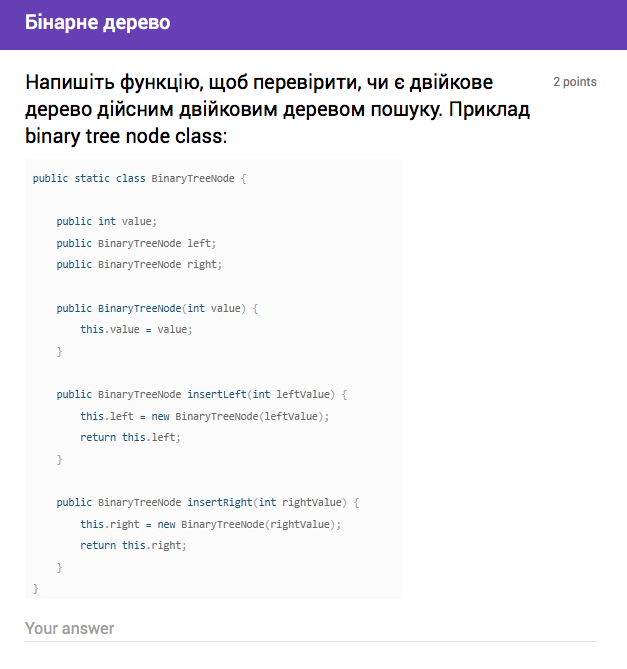

In [4]:
class BinaryTreeNode:
    def __init__(self, value):
        self.left = None
        self.right = None
        self.value = value
        
    def setValue(self, value): self.value = value
        
    def getValue(self): return self.value
    
    def insertLeft(self, node):
        if self.left == None:
            self.left = BinaryTreeNode(node)
        else:
            tree = BinaryTreeNode(node)
            tree.left = self.left
            self.left = tree
            
    def getLeft(self): return self.left
    
    def insertRight(self, node):
        if self.right == None:
            self.right = BinaryTreeNode(node)
        else:
            tree = BinaryTreeNode(node)
            tree.right = self.right
            self.right = tree
            
    def getRight(self): return self.right

class BST:
    def __init__(self):
        self.root = None;
        
    def getRoot(self): return self.root
    
    def insert(self, node, value):
        if node is None:
            self.root = BinaryTreeNode(value);
        else:
            if value < node.value:
                if node.left is None:
                    node.left = BinaryTreeNode(value)
                else:
                    self.insert(node.left, value);
            else:
                if node.right is None:
                    node.right = BinaryTreeNode(value)
                else:
                    self.insert(node.right, value);
        
def showTree(node):
    if node is None: return
    
    showTree(node.getLeft())
    print(node.getValue())
    showTree(node.getRight())
    
def showLeft(node):
    if node is None: return
    
    showTree(node.getLeft())
    print(node.getValue())
    
def showRight(node):
    if node is None: return
    
    showTree(node.getRight())
    print(node.getValue())
    
tree = BST()
tree.insert(tree.getRoot(), 7)
tree.insert(tree.getRoot(), 2)
tree.insert(tree.getRoot(), 6)
tree.insert(tree.getRoot(), 5)
tree.insert(tree.getRoot(), 11)
tree.insert(tree.getRoot(), 5)
tree.insert(tree.getRoot(), 9)
tree.insert(tree.getRoot(), 4)
    
print("Complete tree:")
showTree(tree.getRoot())
print()

print("Sorted left subtree including root:")
showLeft(tree.getRoot())
print()

print("Sorted right subtree including root:")
showRight(tree.getRoot())
print()

Complete tree:
2
4
5
5
6
7
9
11

Sorted left subtree including root:
2
4
5
5
6
7

Sorted right subtree including root:
9
11
7



___

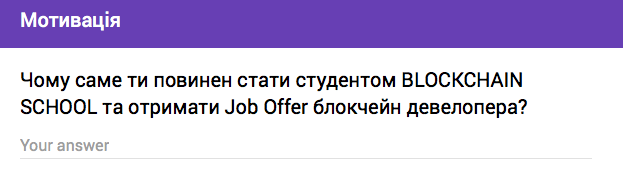

Я верю, что чем больше открытых данных и технологий, тем меньше человечество будет тратить ресурсы чтоб их спрятать от самого себя. Чем больше внедряется систем принятия решений, не зависящих узкой группы ограниченных людей, тем лучше будет жить. У нас, как девелоперов, есть много вариантов куда пойти чтоб улучшить свое благосостояние, можно выбрать, например, мобильные приложения в том или ином виде, которые они примут. Но что толку от еще одной развлекалки? Хочется заниматься чем-то значимым. Это не только блокчейн, в эту категорию можно отнести и machine learning со своим разнообразием направлений. А можно и то, и другое. Главное, что это сложно, интересно и чертовски полезно, причем полезно не эгоцентрично, а с мыслью о светлом будущем и надеждой на лучшее. Кроме того, не сложно догадаться где будут учиться самые светлые умы Политеха, а соответственно и Украины. И еще проще догадаться, что еще более светлые головы будут излагать этот самый сложный и полезный материал. Это же джекпот!